# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Exploring the problem:

For exploring the data, we take these actions:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan?

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives...


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. We first try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv") 
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

The only real "numerical" features are "ApplicantIncome", "CoapplicantIncome" and "LoanAmount". The rest of features are by definition categorical. Even the "Loan_Amount_Term" feature is ordinal, as shown above. Firstly, we define and separate the numerical and categorical features. The, we encode the categorical features to make them ordinal for fearture quantitative investigations. Finally, we remove the "Loan_ID" to make the data anonymus and also because this column doen't provide any information for the loan approval process.

In [5]:
numerical = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term','Loan_Status']

df[numerical] = df[numerical].astype(float)
df[categorical] = df[categorical].astype(object)

In [6]:
df.drop(['Loan_ID'], axis=1, inplace=True)

The most important variable to study first is the "targer" which is here the "Loan_Status":

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

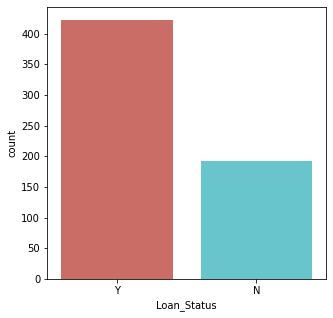

In [7]:
plt.rcParams['figure.figsize']=(5,5)
import seaborn as sb
sb.countplot(x='Loan_Status', data=df, palette='hls')

#### It is important to notice thar the target variable is "imbalanced" and biased toward getting loan approved i.e. "Y": We observe that the ration of the approval to rejection is almost 2.

Then, looking at the central tendancy of the features, we have:

In [8]:
round(df[numerical].describe(),2)

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.00,614.00,592.00
mean,5403.46,1621.25,146.41
std,6109.04,2926.25,85.59
min,150.00,0.00,9.00
25%,2877.50,0.00,100.00
50%,3812.50,1188.50,128.00
75%,5795.00,2297.25,168.00
max,81000.00,41667.00,700.00


In [9]:
df[categorical].describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term,Loan_Status
count,601,611,599,614,582,564.0,614,600.0,614
unique,2,2,4,2,2,2.0,3,10.0,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,360.0,Y
freq,489,398,345,480,500,475.0,233,512.0,422


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [10]:
print('number of missing values in each column is: ', df.isnull().sum(), sep='\n\n')

number of missing values in each column is: 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


To do further quantitative investigations on the features, we encode all the categorical variables to ordinal. We keep the mapping for reference.

In [11]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

for feature in categorical:
    label = LabelEncoder()
    label.fit(df[feature])
    
    mapping = dict(zip(label.classes_, label.transform(label.classes_)))
    print(f'{feature} = {mapping}')
    
    encoded_column = pd.DataFrame(label.transform(df[feature])).astype(float)
    df.drop([feature], axis=1, inplace=True)
    df[feature] = encoded_column

Gender = {'Female': 0, 'Male': 1, nan: 2}
Married = {'No': 0, 'Yes': 1, nan: 2}
Dependents = {'0': 0, '1': 1, '2': 2, '3+': 3, nan: 4}
Education = {'Graduate': 0, 'Not Graduate': 1}
Self_Employed = {'No': 0, 'Yes': 1, nan: 2}
Credit_History = {0.0: 0, 1.0: 1, nan: 2}
Property_Area = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Amount_Term = {12.0: 0, 36.0: 1, 60.0: 2, 84.0: 3, 120.0: 4, 180.0: 5, 240.0: 6, 300.0: 7, 360.0: 8, 480.0: 9, nan: 10}
Loan_Status = {'N': 0, 'Y': 1}


Next, we generate the pairplots of the features to check:
1) the differentiating power of each feature,
2) the distribution of each feature, and
3) possible correlation between features.

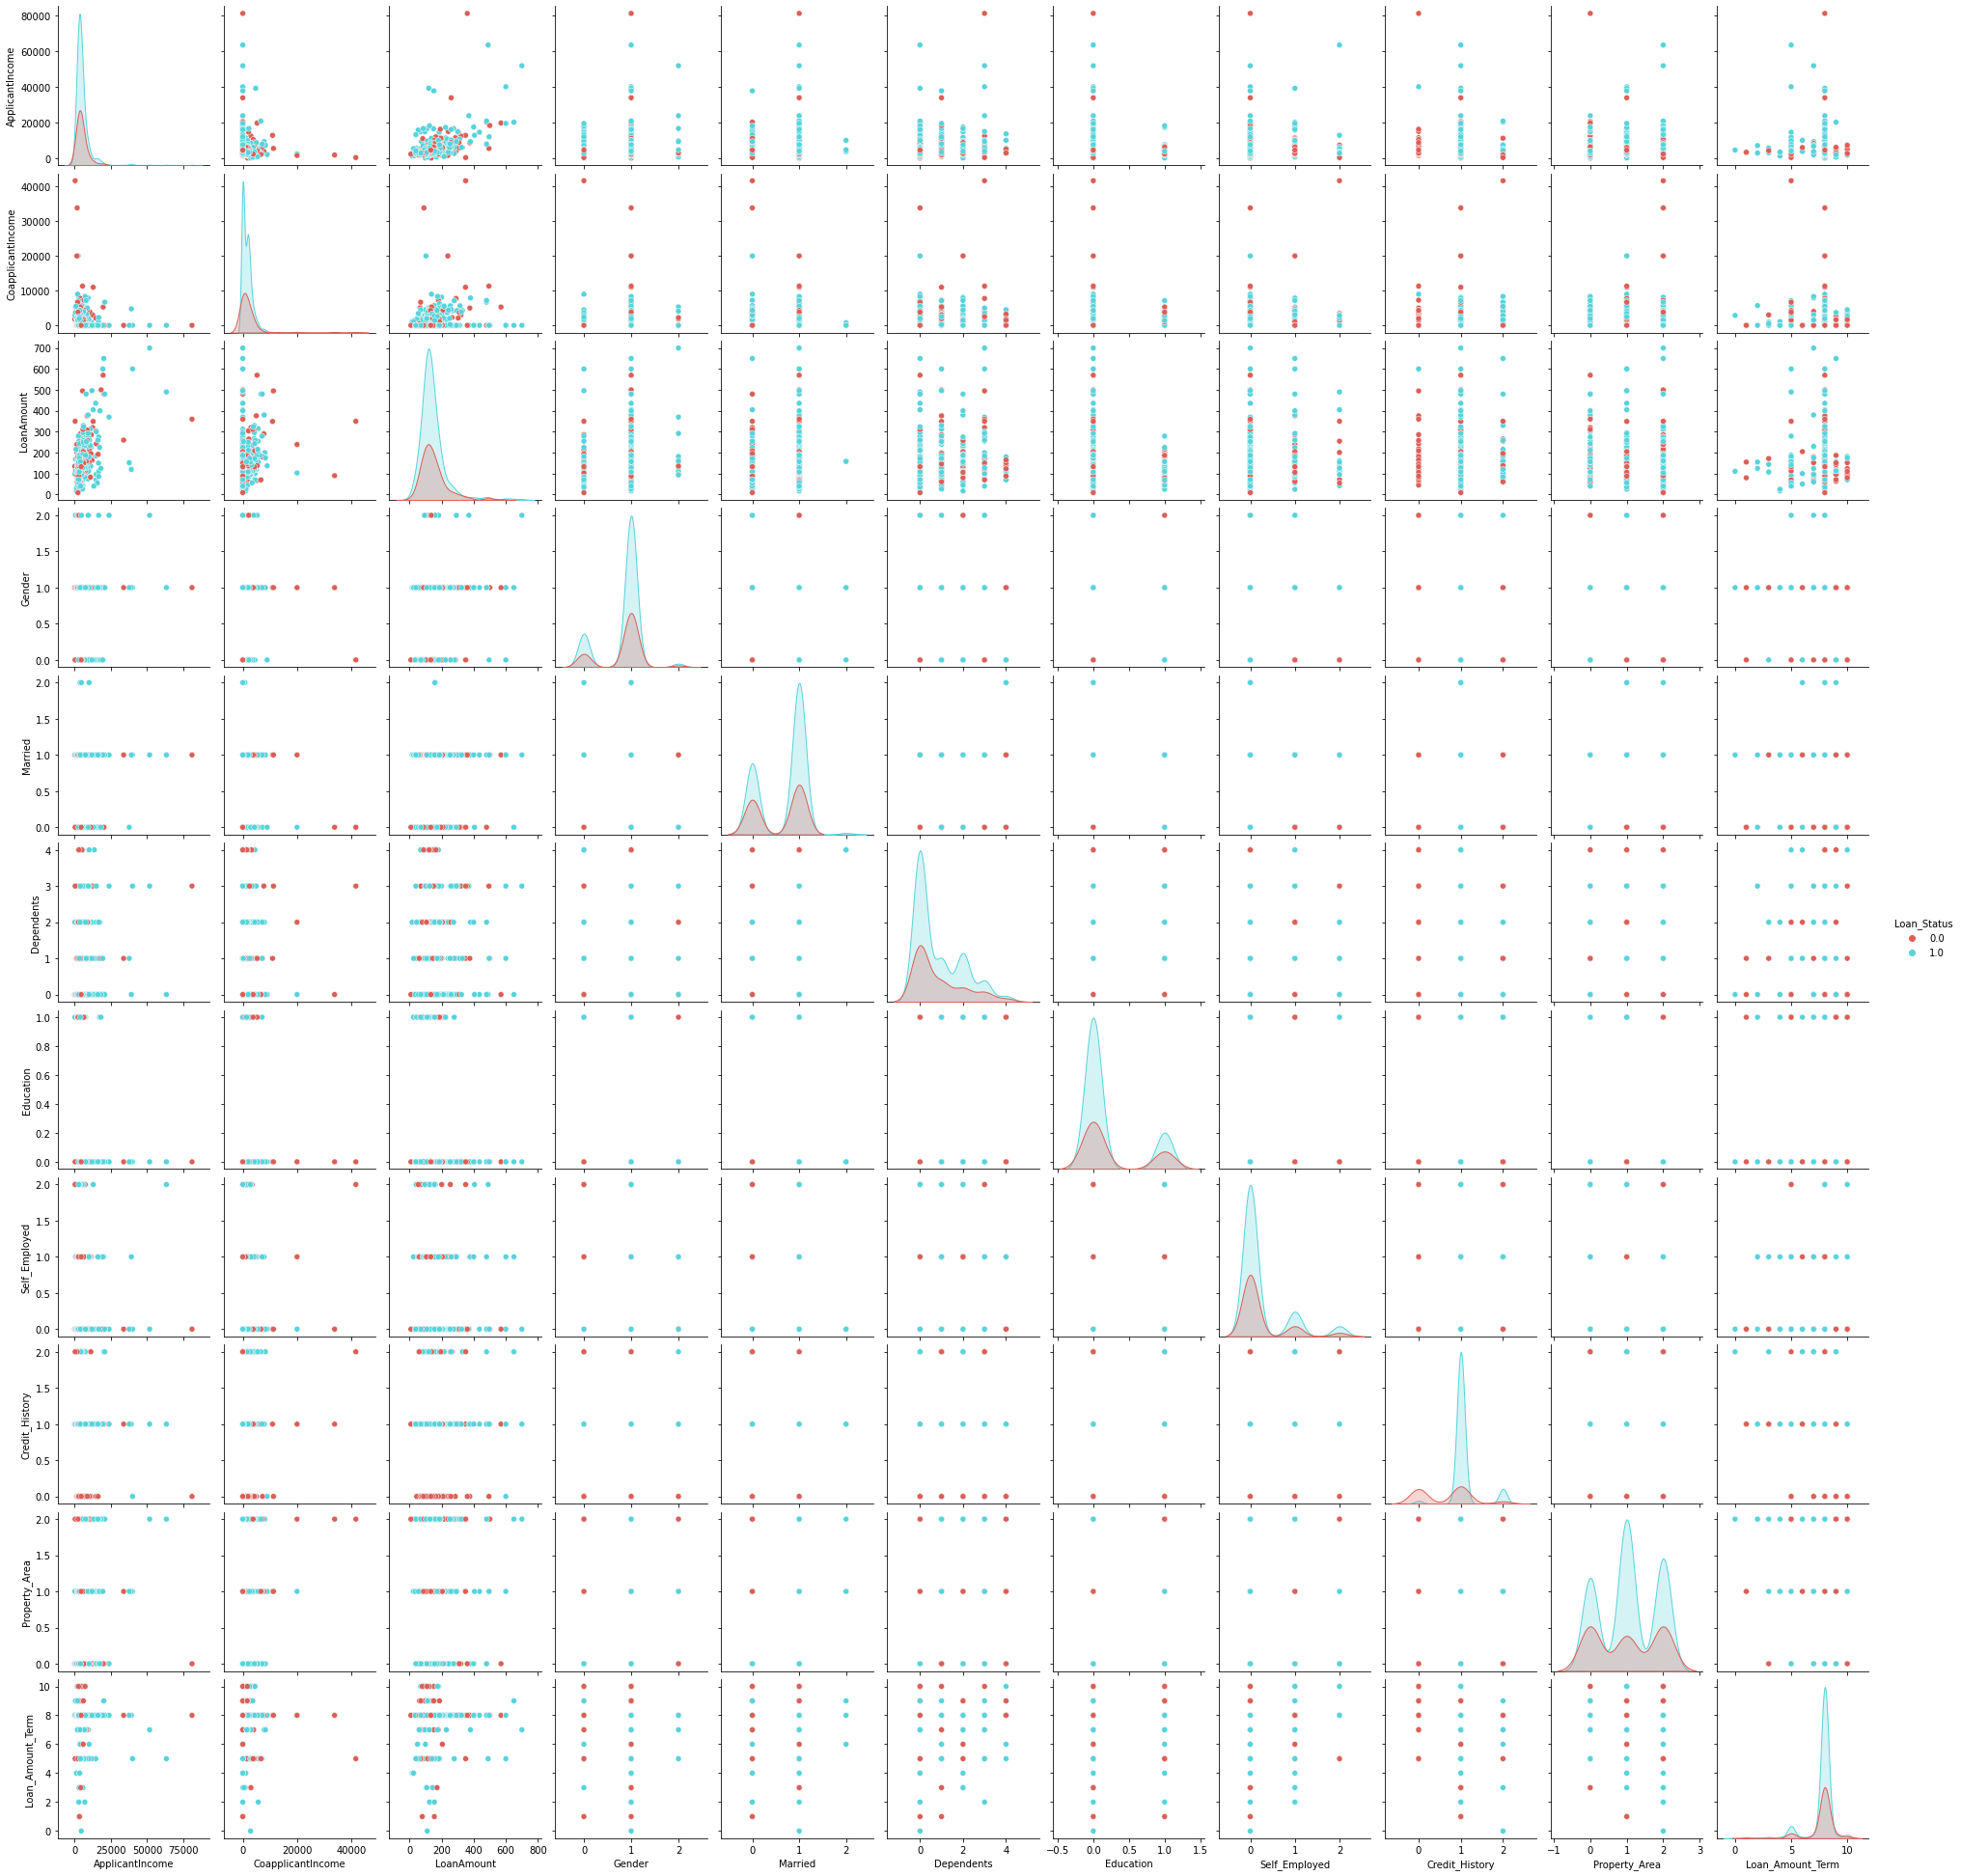

In [70]:
sb.pairplot(df, hue='Loan_Status', palette='hls')

Earlier, we had observed that the number of the loan approval was almost two times of the rejected case. Here too, we observe - from the diagonal distributions for each feature - that the same ratio holds for most of the cases as judged by the peaks of the distributions. The only noticeable exceptions are the "Credit_History" and "Property_Area" features for which the ratios of the approval to rejection cases seem significantly higher than 2.
#### So, it seems the "Credit_History" and "Property_Area" features features may have high differentiating power for the binary classification modeling.

Also, we observe that the distributions of the categorical features are non-normal and there is no linear-looking relationship between these features. These observations suggest that we can use "Chi-squared" test to quantitatively study the correlation between the categorical features - including the target variable.

About the numerical (continous) features, we observe skewed distributions where there seem to be some outliers. Also, it seems there might be some correlation between the "LoanAmount" and "ApplicantIncome" and "CoapplicantIncome" features. We will study the distributions of the continous numerical variables and their correlations, next:

### Distribution analysis

Let's study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

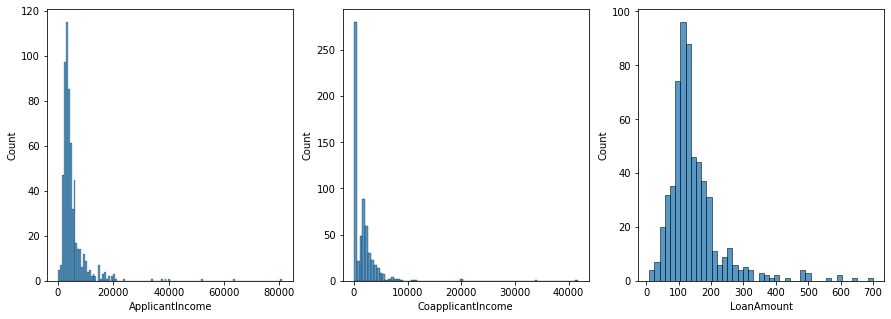

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sb.histplot(df['ApplicantIncome'], ax=ax1)
sb.histplot(df['CoapplicantIncome'], ax = ax2)
sb.histplot(df['LoanAmount'], ax = ax3)

In [20]:
from scipy import stats
from scipy.stats import shapiro

for feature in numerical:
    stat, p = shapiro(df[feature])
    if p>=0.05:
        print(f'p = {p}>=0.05 and {feature} is normally distributed')
    else:
        print(f'p = {p}<0.05 and {feature} is not normally distributed')

p = 4.8126138406832944e-39<0.05 and ApplicantIncome is not normally distributed
p = 8.946238319567249e-39<0.05 and CoapplicantIncome is not normally distributed
p = 1.0>=0.05 and LoanAmount is normally distributed


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

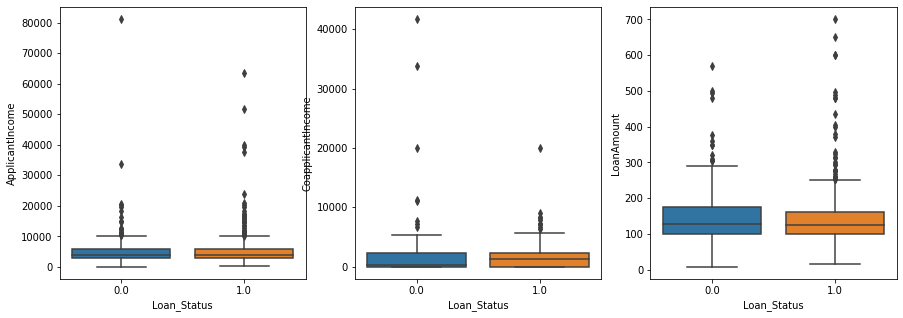

In [21]:
plt.rcParams['figure.figsize']=(15,5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

sb.boxplot(y='ApplicantIncome',x='Loan_Status',data=df, ax=ax1)
sb.boxplot(y='CoapplicantIncome',x='Loan_Status',data=df, ax=ax2)
sb.boxplot(y='LoanAmount',x='Loan_Status',data=df, ax=ax3)

From the results above, we observe that "LoanAmount" feature is normally distributed but the two other "ApplicantIncome" and "CoapplicantIncome" are not. However, they all have considerable number of outlier cases which we need to deal with.

We first investigate the correlations in the categorical variales which consist most of the available data to decide on what variables to consider. Then we shift our focus to the numerical variables. The way we decide to deal with the variables (e.g. to consider it or not or to transform it) has direct effect on how/whether to deal with missing value, as well.

Since we haven't observed any evidence that suggest our categorical variables are normally distributed or there may be a linear relationship between them, we can use the searsmanr to check the correlations between various categorical variables - including the target variable. 

<AxesSubplot:>

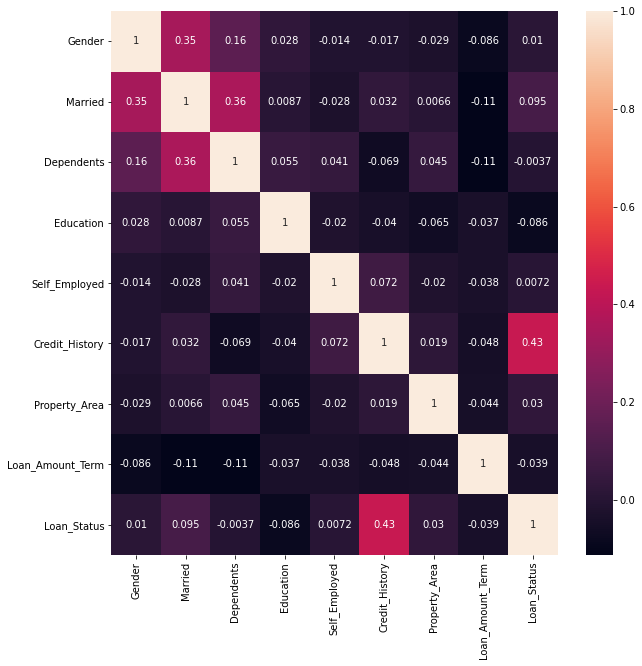

In [22]:
from scipy.stats import spearmanr
categorical_corr_table = df[categorical].corr()
for feature1 in categorical:
    for feature2 in categorical:
        corr, pval = spearmanr(df[feature1],df[feature2])
        categorical_corr_table[feature1][feature2] = corr
        
plt.rcParams['figure.figsize']=(10,10)
fig,ax = plt.subplots(1,1)
sb.heatmap(categorical_corr_table, ax=ax, annot=True)

We observe no outstanding correlation with the target (i.e. all correlations are less than 0.6). So, we don't none of the feature can act as a differentionator by themselves. However, the good news is that the correlation between most of the variables are very low meaning that if we use them together there is minimal chance of collinearity. The only exceptions seem to be "Gender" and "Married". Also, "Credit_History" show relatively high correlation with the target. In conclusion, we would certainly use "Credit_History" in our modeling and we won't use "Gender". In the modeling step, we will iterate between all the other remaining features to come up with the best selection of the categorical features.

#### It makes sense that banks count on "Credit_History" for approving loans as we observe in the data. Also, that we observe some correlation between "Married", "Gender" and "Dependents" is reasonable because these kinds of data are by definition relevent to each other.

Next, we check the correlation between numerical variables:

<AxesSubplot:>

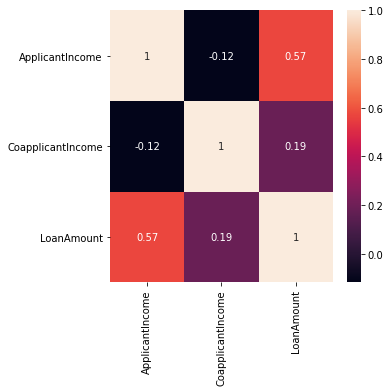

In [23]:
numerical_corr_table = df[numerical].corr()

plt.rcParams['figure.figsize']=(5,5)
fig, ax = plt.subplots(1,1)
sb.heatmap(numerical_corr_table, annot=True,ax=ax)

#### We observe outstandingly high correlation between "ApplicationIncome" and "LoanAmount". We can hypothesize that people with higher income tend to apply for larger amount of loans because they can afford. For the modeling purpose, this means we should not use both "ApplicantIncome" and "LoanAmount" together.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

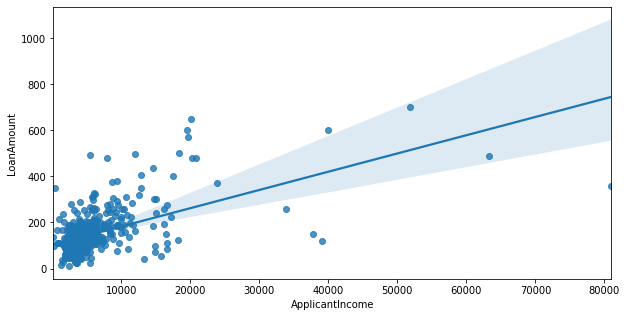

In [24]:
plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots(1,1)
sb.regplot(x='ApplicantIncome',y='LoanAmount', data=df, scatter=True, ax=ax)

To see how good the numerical variables that we have are for the modelling, we need to check the correlation between these variables and the target variable. Since the target variable in categorical, we should bin the numerical variables to make them ordinal and use spearmanr.
#### Binning would also be helpful to deal with the outliers we observe in the numerical variables because we can put all extreme values in one bin.

We check bin each of the numerical variables and check its correlation with the target. We need to apply filters to only consider the non-null values and those data that are not on the edge. We should not impute, fill or remove the missing values at this stage:

ApplicantIncome:

In [25]:
ApplicantIncome_bin = pd.qcut(df['ApplicantIncome'],np.linspace(0,1,num=5))

ApplicantIncome_corr, _ = spearmanr(ApplicantIncome_bin,df['Loan_Status'])
print(f'The correlation with the target is: {ApplicantIncome_corr}')


The correlation with the target is: -0.003142234657972501


CoapplicantIncome:

In [26]:
filter_zero = df['CoapplicantIncome']>0
CoapplicantIncome_bin = pd.qcut(df['CoapplicantIncome'][filter_zero],np.linspace(0,1,num=5))

CoapplicantIncome_corr, _ = spearmanr(CoapplicantIncome_bin,df['Loan_Status'][filter_zero])
print(f'The correlation with the target is: {CoapplicantIncome_corr}')

The correlation with the target is: -0.08989353001564415


LoanAmount:

In [27]:
filter_nan = ~df['LoanAmount'].isnull()
LoanAmount_bin = pd.qcut(df['LoanAmount'],np.linspace(0,1,num=5))
LoanAmount_corr, _ = spearmanr(LoanAmount_bin[filter_nan],df['Loan_Status'][filter_nan])
print(f'The correlation with the target is: {LoanAmount_corr}')

The correlation with the target is: -0.03512461462021732


Surprisingly, all three variables show "negative" correlations but the values are very small to be conclusive. 

## 3. Feature Engineering

With numerical variables we have the opportuinity to manupulate the data to come up with better features. Some ideas are:

* Combining the incomes because this is the total paying-back power that banks may look into
* Combining incomes, loan and term to come up with a "loan-affordibility" feature
* Using transformation in the data to improve the distribution of the data

We try these ideas one by one and look at the correlation and distribution of the resulting variables

TotalIncome:

In [34]:
TotalIncome = df['ApplicantIncome']+ df['CoapplicantIncome']
TotalIncome_bin = pd.qcut(TotalIncome,np.linspace(0,1,num=5))
TotalIncome_corr, _ = spearmanr(TotalIncome_bin,df['Loan_Status'])
print(f'The correlation with the target is: {TotalIncome_corr}')

The correlation with the target is: 0.0052609624394174105


Given we cannot use the income and loan amount together in modeling, we can use the two features to develop a new one. The "Affordability" measures how much an applicant's monthly income will go toward loan re-payment:

In [71]:
Monthly_payment = (df['LoanAmount']*1000/df['Loan_Amount_Term'])

In [38]:
Affordability = TotalIncome/Monthly_payment
filter_zeronan = (Affordability>0 & ~Affordability.isnull())
Affordability_bin = pd.qcut(Affordability[filter_zeronan],np.linspace(0,1,num=5))
Affordability_corr, _ = spearmanr(Affordability_bin,df['Loan_Status'][filter_zeronan])
print(f'The correlation with the target is: {Affordability_corr}')

The correlation with the target is: -0.018499964836458382


<AxesSubplot:>

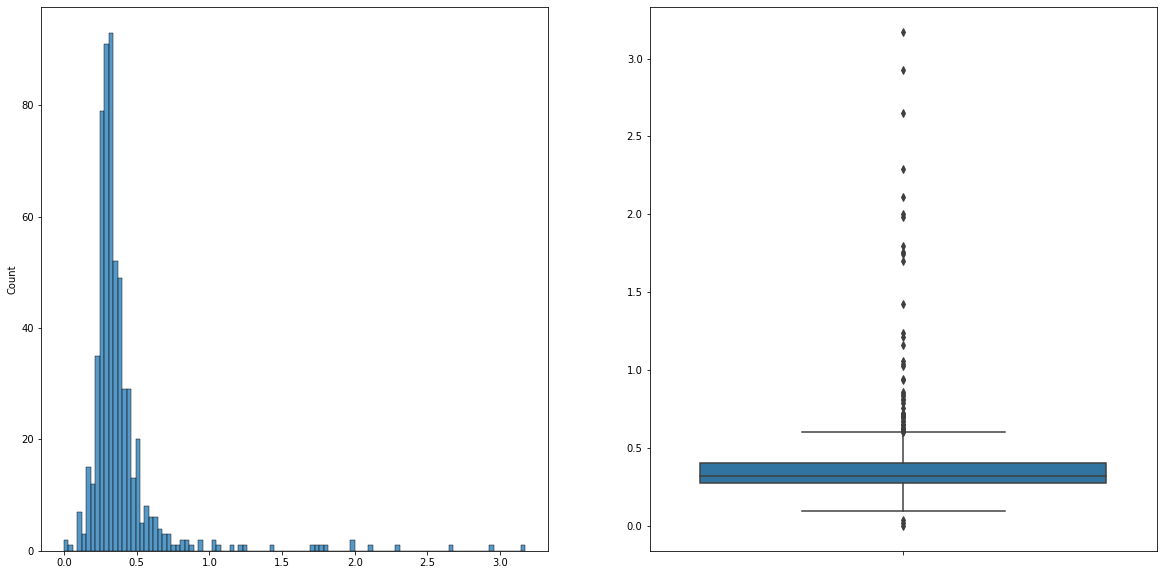

In [40]:
plt.rcParams['figure.figsize']=(20,10)
fig, (ax1,ax2) = plt.subplots(1,2)
sb.histplot(x=Affordability, ax=ax1)
sb.boxplot(y=Affordability, ax=ax2)

In [41]:
stat, p =shapiro(Affordability)
if p>=0.05:
    print(f'p = {p}>=0.05 and {feature} is normally distributed')
else:
    print(f'p = {p}<0.05 and {feature} is not normally distributed')

p = 1.0>=0.05 and LoanAmount is normally distributed


We observe that defining the new feature did not improve the correlation but transformed the correlated numerical variables into one interprettable one which is normally distributed, too. 
The new variable has still considerable number of outliers. As mentioned, one way to deal with the outliers is to bin it. We will check this next.

## 4. Data Cleaning 

For cleaning the data, we need to decide how/if immute the missing values of various variables and also deal with outliers. 

For dealing with missing values, we have three choices:
1) Considering most of our variables being categorical, we can consider missing value as a type. This is especially useful when the variable is not as important and omitting the corresponding records, destroys the records of other variable which we consider to be much more important. 
2) We simply omit the corresponding record.
3) We replace the missing values by the central/most repeated values or the values we can infer using other data 

The missing values for the various variables are:

Gender: 13,
Married: 3,
Dependents: 15,
Education: 0,
Self_Employed: 32,
ApplicantIncome: 0,
CoapplicantIncome: 0,
LoanAmount: 22,
Loan_Amount_Term: 14,
Credit_History: 50,
Property_Area: 0,
Loan_Status: 0.

We concluded through the correlation study that most of variables with missing values are not as important. These variables include: Married, Dependents and Self_Employed. For these variables, we consider missing data as a type, as we have already done.

For the case of LoanAmount and Loan_Amount_Term, since we have used these variables - together with combined income - to engineer a new variable "Affordability" which is normally distributed, we can simply immute the missing values of the final variable with the mean to nuturalize the effect of these cases in the modeling process.

Finally, we look into the missing values of the "Credit_History" to see if we can infer anything and then decide on how to deal with them.

In [33]:
table = round(pd.crosstab(df['Credit_History'],df['Loan_Status'])/df['Loan_Status'].shape[0]*100)
print('percentage of the total cases:\n')
table

percentage of the total cases:



Loan_Status,0.0,1.0
Credit_History,,
0.0,13.0,1.0
1.0,16.0,62.0
2.0,2.0,6.0


It is observed that that lacking "Credit_History" data is not conclusive in loan approval or rejection. Noting that for Loan_status 0 is rejection and 1 in approval and for Credit_History 0 is N, 1 is Y and 2 is NAN (data missing). We see that 6% of the total cases got approved with Credit_History missing and these cases are 3 times of the cases that the loan got rejected with missing Credit_History data (2%). We can conclude that even though the Creit_History seems to be the most important variable based on correlation with the target, in case of missing, decission can be made based on other available data. This is also true for all other variables for which we considered "missing data" as a type.

Last but not least, we look into the outliers of the Affordability to decide how to deal with them:

In [72]:
Affordability.describe()

count    614.000000
mean       0.391405
std        0.293601
min        0.000000
25%        0.276669
50%        0.326803
75%        0.399979
max        3.170933
dtype: float64

Considering the normal distribution of the Affordability, we can imute the missing data with the mean.

In [60]:
Affordability[Affordability.isnull()] = Affordability.mean()

For binning, the ultra-low outliers cause problems:

In [61]:
Affordability[Affordability<=0]

497    0.0
dtype: float64

Because it is only a single case, we can omit it.

Before moving foreward, we bin the Affordability and re-calculate the correlation between the Affordability and the target variable.

In [69]:
Affordability_bin = pd.qcut(Affordability[filter_zeronan],np.linspace(0,1,num=5))
Affordability_corr, _ = spearmanr(Affordability_bin,df['Loan_Status'][filter_zeronan])
print(f'The correlation with the target is: {Affordability_corr}')

The correlation with the target is: -0.018499964836458382


The number of low and high outliers are large and we will damage the data by removing them:

In [67]:
print('high outliers:')
Affordability[Affordability>=0.405776].count()

high outliers:


148

In [73]:
print('high outliers:')
Affordability[Affordability<=0.275451].count()

high outliers:


148

We can keep the outliers by using the "Affordability_bin" instead of "Affordability" by labeling the low and high outliers by their bin number.